### Import libraries

In [5]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### Check out the directories

In [6]:
# inserting the parent directory into current path
sys.path.insert(1, '../COVID_19/')

### Checking out the files and numbers.

In [8]:
NORMAL_dir = '../Dataset_4_classe_second_approach/Train/NORMAL/'
NORMAL_img_list = os.listdir(NORMAL_dir)
NORMAL_count = len(NORMAL_img_list)
print('NORMAL_count = ', NORMAL_count)

Covid_dir = '../Dataset_4_classe_second_approach/Train/Covid/'
Covid_img_list = os.listdir(Covid_dir)
Covid_count = len(Covid_img_list)
print('Covid_count = ', Covid_count)

Streptococcus_dir = '../Dataset_4_classe_second_approach/Train/Streptococcus/'
Streptococcus_img_list = os.listdir(Streptococcus_dir)
Streptococcus_count = len(Streptococcus_img_list)
print('Streptococcus_count = ', Streptococcus_count)

Pneumocystis_dir = '../Dataset_4_classe_second_approach/Train/Pneumocystis/'
Pneumocystis_img_list = os.listdir(Pneumocystis_dir)
Pneumocystis_count = len(Pneumocystis_img_list)
print('Pneumocystis_count = ', Pneumocystis_count)

NORMAL_count =  196
Covid_count =  196
Streptococcus_count =  12
Pneumocystis_count =  21


Number of Normal and Covid cases are balanced. I will increase the number of two other classes.

Make a balancing data generator.

In [9]:
balancing_data_gen = image.ImageDataGenerator(
                    rotation_range=0, width_shift_range=0.0,
                    height_shift_range=0.0,
                    shear_range=0.2, zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest')

pick random image from source directory and make new one.
### Balance Pneumocystis images.

In [10]:
Pneumocystis_Number_tobe_generated = (NORMAL_count)

if not os.path.exists( '../Dataset_4_classe_second_approach/Train/Pneumocystis/'):
    os.makedirs('../Dataset_4_classe_second_approach/Train/Pneumocystis/')
    
for i in range(0, Pneumocystis_Number_tobe_generated):
    

    # select a random img
    rand_img_num = random.randint(0, Pneumocystis_count-1)
    img_name = Pneumocystis_img_list[rand_img_num]

    img_address = Pneumocystis_dir + img_name
    img = load_img(img_address)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    

    for batch in balancing_data_gen.\
                flow(x,batch_size=1,
                save_to_dir='../Dataset_4_classe_second_approach/Train/Pneumocystis/',
                save_prefix='Pneumocystis',
                save_format='jpeg'):
        break

        
        
generated_Pneumocystis_dir = '../Dataset_4_classe_second_approach/Train/Pneumocystis/'
generated_Pneumocystis_img_list = os.listdir(generated_Pneumocystis_dir)
generated_Pneumocystis_count = len(generated_Pneumocystis_img_list)
print('generated_Pneumocystis_count = ', generated_Pneumocystis_count) 

generated_Pneumocystis_count =  214


### Balance Streptococcus images.

In [11]:
Streptococcus_Number_tobe_generated = (NORMAL_count)

if not os.path.exists( '../Dataset_4_classe_second_approach/Train/Streptococcus/'):
    os.makedirs('../Dataset_4_classe_second_approach/Train/Streptococcus/')
    
for i in range(0, Streptococcus_Number_tobe_generated):
    

    # select a random img
    rand_img_num = random.randint(0, Streptococcus_count-1)
    img_name = Streptococcus_img_list[rand_img_num]

    img_address = Streptococcus_dir + img_name
    img = load_img(img_address)

    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    

    for batch in balancing_data_gen.\
                flow(x,batch_size=1,
                save_to_dir='../Dataset_4_classe_second_approach/Train/Streptococcus/',
                save_prefix='Streptococcus',
                save_format='jpeg'):
        break

        
        
generated_Streptococcus_dir = '../Dataset_4_classe_second_approach/Train/Streptococcus/'
generated_Streptococcus_img_list = os.listdir(generated_Streptococcus_dir)
generated_Streptococcus_count = len(generated_Streptococcus_img_list)
print('generated_Streptococcus_count = ', generated_Streptococcus_count)

generated_Streptococcus_count =  207


The Noraml and Covid images were copied from base folder.

# Flow data

In [20]:
train_datagen = image.ImageDataGenerator(
                featurewise_center=False, samplewise_center=False,
                featurewise_std_normalization=False, samplewise_std_normalization=False,
                zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0,
                height_shift_range=0.0, brightness_range=None, shear_range=0.2, zoom_range=0.2,
                channel_shift_range=0.0, fill_mode='nearest', cval=0.0,
                horizontal_flip=True, vertical_flip=False, rescale=1./255,
                preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)

In [21]:
train_generator = train_datagen.flow_from_directory(
                    directory='../Dataset_4_classe_second_approach/Train/',
                    target_size=(224,224),
                    color_mode="rgb",
                    classes=None,
                    class_mode="categorical",
                    batch_size=32,
                    shuffle=True,
                    seed=1234,
                    save_to_dir=None,
                    save_prefix="",
                    save_format="png",
                    follow_links=False,
                    subset=None,
                    interpolation="nearest")

Found 813 images belonging to 4 classes.


### Show some images after data augmentation

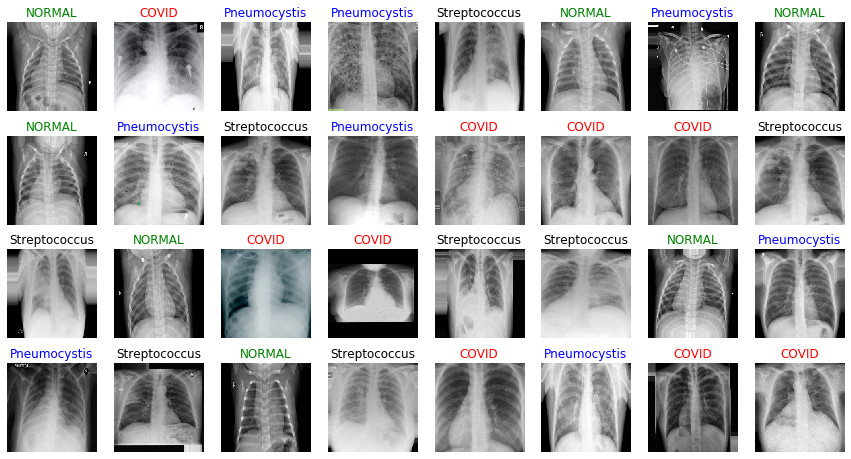

In [28]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 8))
    for n in range(32):
        ax = plt.subplot(4, 8, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n][0]==1:
            tit = plt.title("COVID")
            plt.setp(tit, color='r')
            
        elif label_batch[n][1]==1:
            tit = plt.title("NORMAL")
            plt.setp(tit, color='g')

        elif label_batch[n][2]==1:
            tit = plt.title("Pneumocystis")
            plt.setp(tit, color='b')
        else:
            plt.title("Streptococcus")
        plt.axis("off")

show_batch(image_batch, label_batch)
plt.savefig("../Assets/plot_01_assets_2_4classes_balanced_second_app.png")

In [29]:
classes = pd.DataFrame(train_generator.classes)
classes[0].value_counts(normalize=False)

2    214
3    207
1    196
0    196
Name: 0, dtype: int64

Now I take val and test from the train folder for every 4 categories. 

```
Dataset_4_classe_second_approach folder tree structure
├───Test
│   ├───Covid, 4
│   ├───NORMAL, 4
│   ├───Pneumocystis, 4
│   └───Streptococcus, 4
├───Train
│   ├───Covid, ~180
│   ├───NORMAL, ~180
│   ├───Pneumocystis, ~180
│   └───Streptococcus, ~180
└───Val
    ├───Covid, 16
    ├───NORMAL, 16
    ├───Pneumocystis, 16
    └───Streptococcus, 16
```